<a href="https://colab.research.google.com/github/palashbaranwal/END3/blob/main/Session6/END3_Session_6_Palash_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNN/LSTM with Attention Mechanism

Probably we wont be using them, because tranformers are really good, and we might not need RNN/LSTM

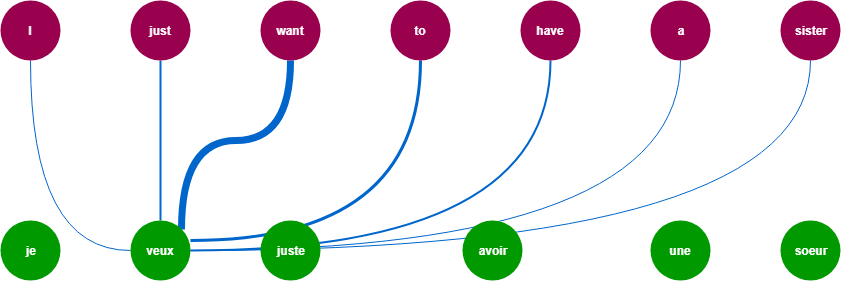

**Figure 1 - Language Translation Example**

Google is the first company to solve language translation problem. Because they already have their search engine setup, and other companies are following now. 

Site to draw - https://www.tldraw.com/

Do we know in advance how many times our decoder is going to run? - At the end of token, it can stop. But while training, we dont know. There are two approaches to identify this:

1. Look at the ground truth. If we know that the nodes in decoder needs to be 6 words long, we can restruct number of times to 6 for a decoder. 

2. We decide, that we will strict our output at global level say for example 10, because thats the max we have seen. 

#Which is a better approach from the two?

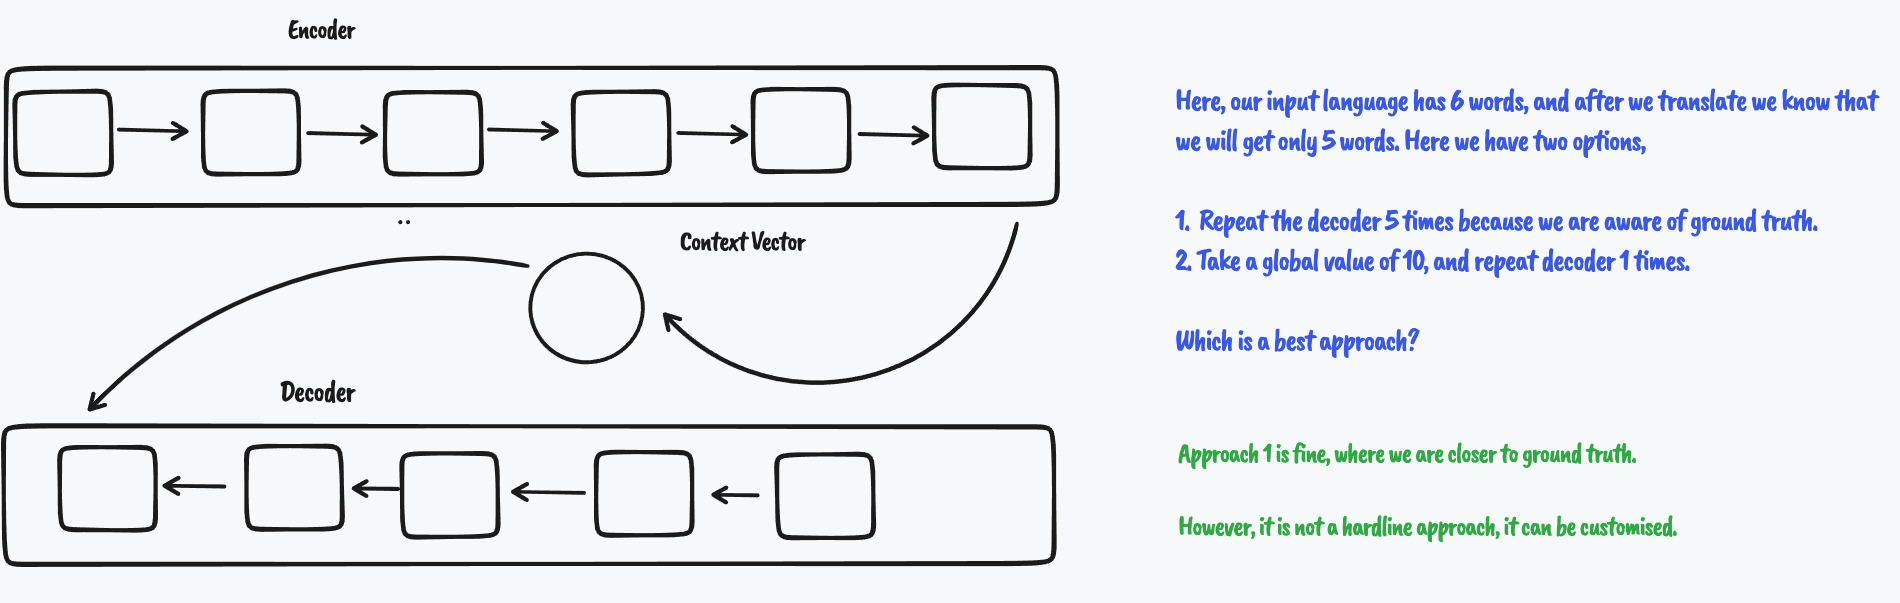


**Figure 2 - Encoder Decoder (LSTM)**

Now, in practical cases we always have, two extra tokens 
1. SOS - Start of Statement
2. End of Sentence

We might find this exercise useless after this session, but it helps us understand 

## How model actually learns?

I am thinking of an animal, which animal I am thinking about?

1. Dog - No
2. Cat - 0.1
3. Horse - 0
4. Lion - 0.5
5. Tiger - 0.9
6. Giraffe - -0.5
7. Bengal Tiger - 1 

This is what happens in **Stochastic Gradient Descent**, everytime our model is trying to move in some diretion, if loss is smiling we know that we are moving in right direction, and takes next step, thats how model actually learns. This happens millions of times, with millions of parameters, and hence, models are slowly learning. This is literally what happens in **back propagation** algorithm. Hence, here we knew, when we jumped from cat to lion, we knew we are close, and when we moved to tiger we realized we are even closer.

*That is how our model also learns, i.e. when our model at the end of sentence has to predict EOS, and it predicts SOS, and these two had similar embeddings, why, because, even if we are predicting SOS, and even if we are getting a loss, its better than predicting something like a CAT. So it might start changing some of the embeddings and it might become closer to EOS. This way, model also learns where in each epoch we change millions of things millions of times. * -  Not very clear

Now we can think and get an intuition, like, if we have millions of parameters, and they want to move in a right direction, what can we do to get them moving in right direction, what kind of regularization we can do in the model, what kind of shaking we need to do in the model. 

And we can always **go to the physical world and take some examples**

Imagine we have a small box here, and we have these small balls. 

 


 



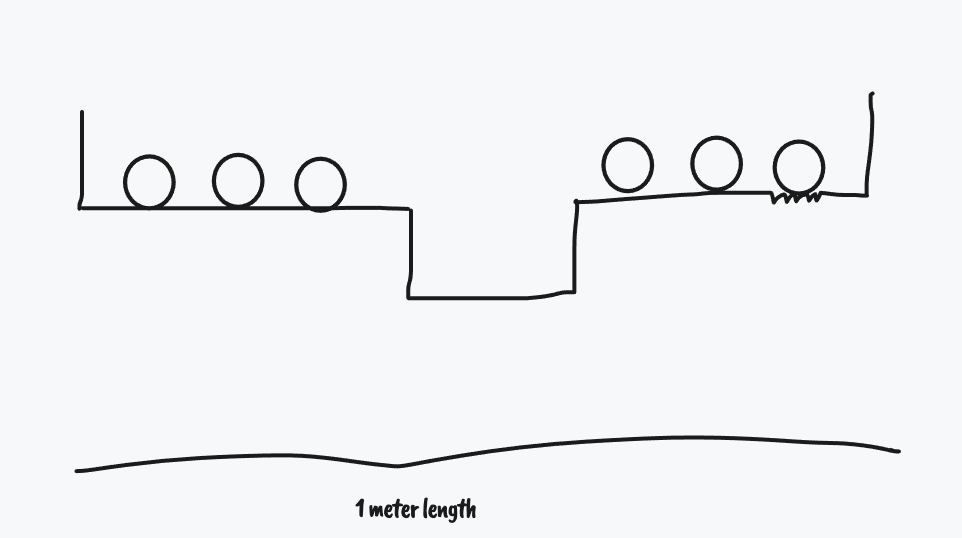

**Question** - Now say, we can only take steps of 5 cm and we need to push al l
the balls in then bucket. What should we do? We can perform any step 
like, 1. shaking, 2. tilting, 3.  moving one step at a time. 

**Answer** - We cannot do tilting, because 3 balls will go into the hole, but 3 will go the other way, loss for 3 balls will decrease to 0, but for the other 3 balls, will increase. 

One solution is, we can shake the box by 5 cm, such that, they collide with each other and they start falling into the hole, as they cant go beyond the boundaries of the box.  And this shaking is called as **Gaussian Noise**. And if we start using Gaussian noise, we will realize that it will start training the model in a much better way. 

Its like giving a very small nudge to a straight line. Such that gradient descent of that small nudge is same as gradient descent of that larger nudge. 

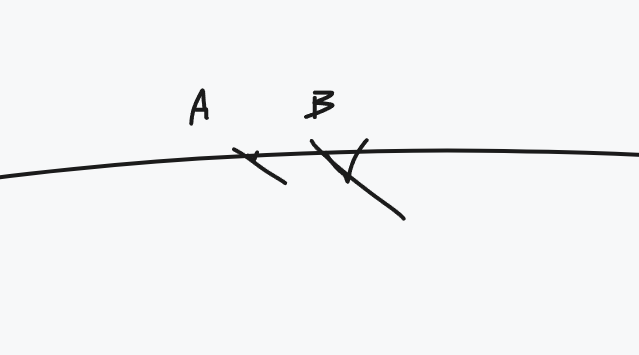

**Figure 4 - Illustration of Gaussian Noise**

On this line, we have two nudges, A and B. Nudge A is very small, and B is large, but gradient descent for both of them is same.   

**Another example**

Because of our daily interactions, we thnk about lnear numbers, 1,2,3,4 and so on. But when we are talking about ML algorithms and DL algorithms, we talk atleat in the second order, we talk about speed, acceleration, velocity. We always talk about dx/dt kind of stuff.

Because of this second order, we always feel that we haven't changed a lot, but that small change has a big impact. All these things will become obvious in our next session, which is **Regularization**. 

##We have a problem now

Now as a part of Figure 2, we know that our context vector understands everything, and predicts next word in the output sentence sequentially.  

But for cases mentioned, in the Figure 1, we see that 3rd word in the input layer gives output of 2nd word in output layer. Then, how our LSTM (Figure 2) will handle this?

1. We can use bi-directional LSTMs, such that there is 1:1 mapping between words in input and output layer. 

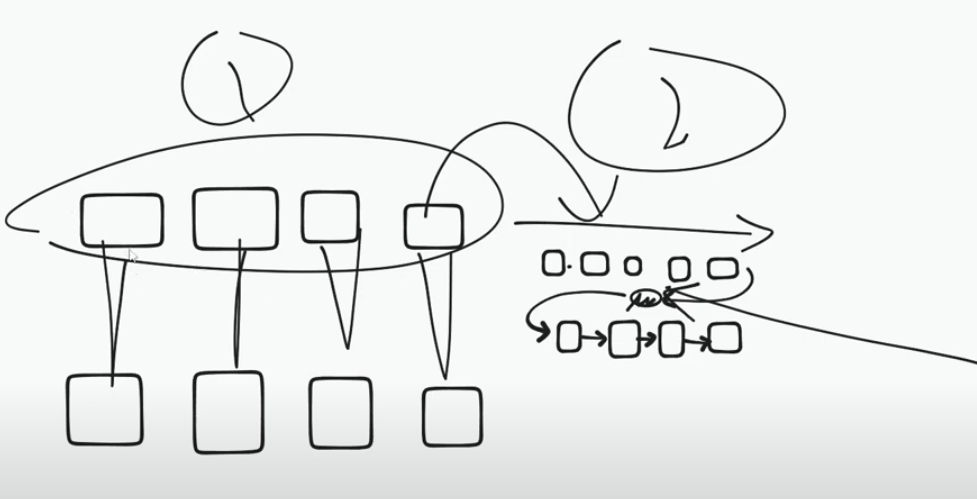

**Figure 5 - Bi-directional LSTM (Model 1) VS Standard LSTM (Model 2)** 




However, in this case, model 2 in figure 5 is advanced version of model 1, because the context vector in model 2 has a higher context of everything in input layer (sentence 1), hence bi-directiona LSTMs cannot be used.

2. Second solution to this is **Attention**.

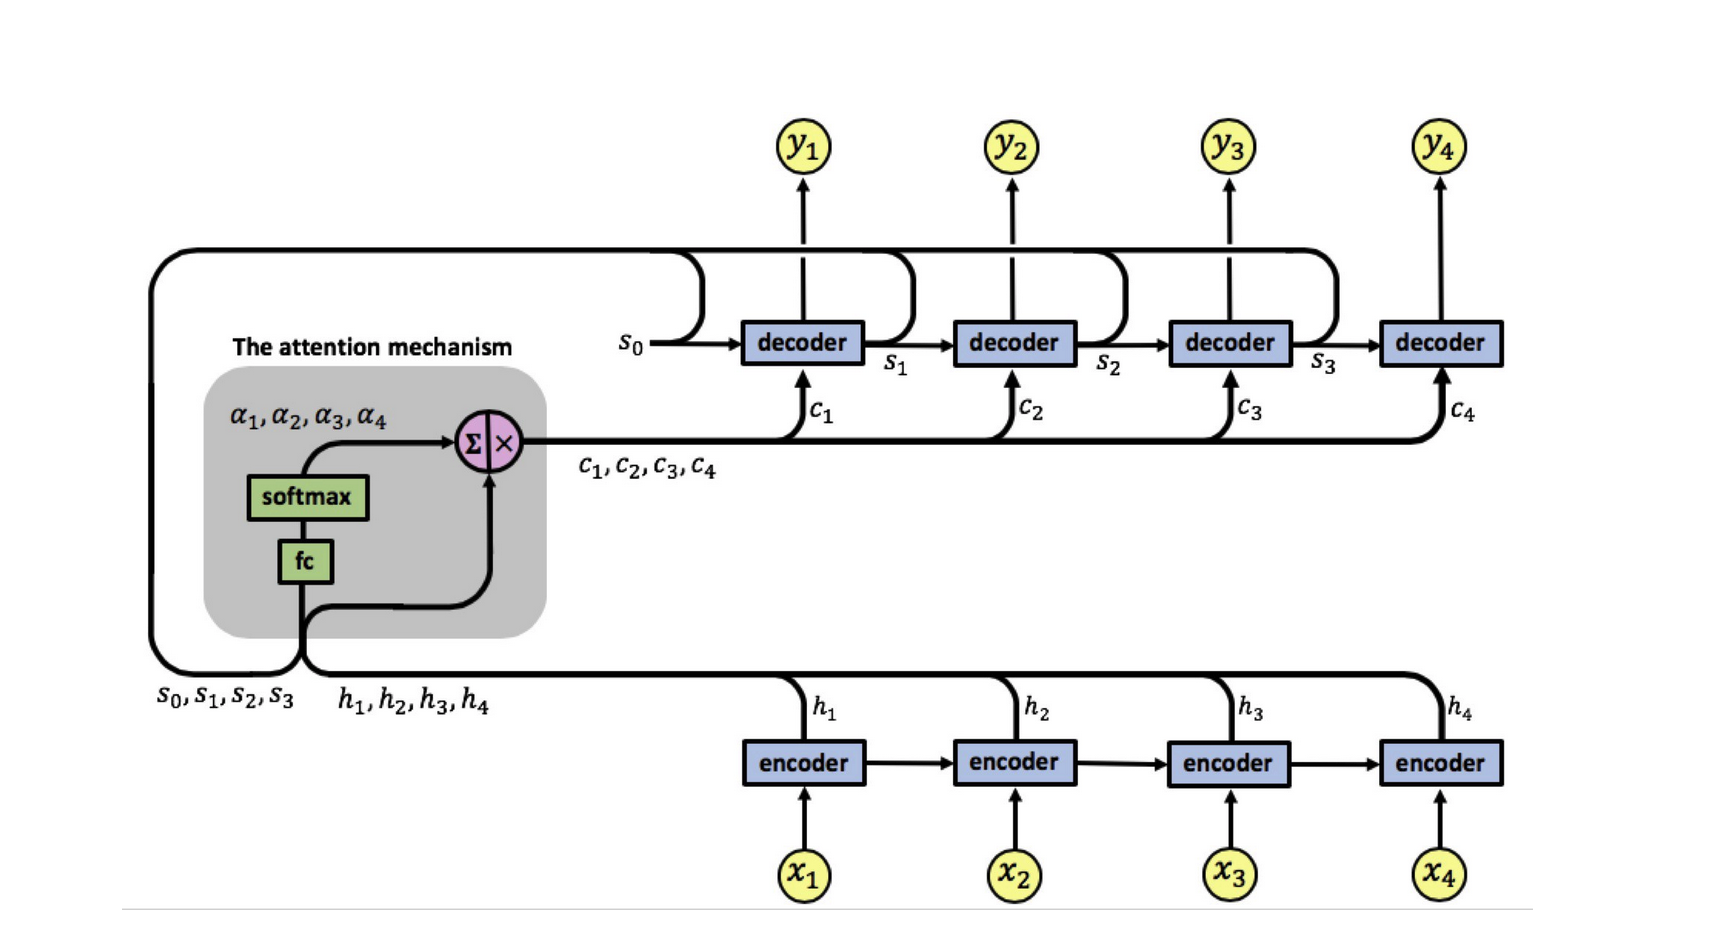

**Figure 6: Simple Attention RNN/LSTM model**

1. Here, h1, h2, h3, h4 are h4 are hidden states. And h4 has better context of all the inputs x1, x2, x3 and x4.

2. h1, h2, h3, h4 can be seen as a improvement in the embeddings as with each progression the new hidden state has seen more words.

3. **Question** - If I need to predict a particular word for input word x3, which vector should we be using?

  **Answer** - It should be h3 definitely, because it has seen all the words preceding x3.

  **Why not h4?** - Because h4 will have lots of features of x4 as well.

4. **Question** - Which word should s0 focus on? Should it be h1, h2, h3 or h4?

  **Answer** - s0 is almost a target, and it should know the context for all. Hence, we do not know if it is focusing on h1, h2, h3 or h4. Hence, we can also say that it focuses on all the 4 vectors, to get a better context and learn from all.

  It also, depends on the language we are translating to. Say for example 

  **Input (In English)** - How have you been this year?

  **Japanese** - Kotoshi wa dōdeshita ka?

  **Hindi** - आप इस साल कैसे रहे?

  **Arabic** - kayf halak hadha aleam

  **Italian** - come sei stato quest'anno?

  **Spanish** - ¿Cómo has estado este año?

  **Russian** - kak ty byl v etom godu?

  In above examples, the first word in Hindi sentence is a translation of 3rd word in English sentence. Hence, if we are building a translation model the 1st output word will be based on 3rd input, hence there needs to be an additional factor Alpha for each hidden vector h, where Alpha corresponds to the relevance of a particular input word for the output word. And for each context vector c, there are different values for Alpha corresponding to each input word.  



1. Now,  I have four vectors s0h1, s0h2, s0h3, s0h4. 
2. We are going to send these 4 pairs to Fully Cnnected layer, that means FCL will run 4 times, once for s0h1, then for s0h2, then for s0h3, and then for s0h4.
3. FC layer needs to figure out which of the pair has highr correlation.
4. If s0 is highly correlated with h1, then we need to focus on h1.
5. And hence, the FC layer,will result in 4 numbers, which denotes the correlation of s0 with all the 4 hidden vectors.
6. As these 4 correlations will not be normalized, we need to normalized these numbers, and hence, we will send these numbers to Softmax.
7. The softmax function will generate normalized 4 vectors. Then, we will multiple ⍺1 with h1, ⍺2 with h2, ⍺3 with h3 and ⍺4 with h4, and add them.
8. Lets say, if we want to have h1 to have highest impact on s0, then we want ⍺1 to be close to 1.
9. Hence, the sum total, i.e. ⍺1h1 + ⍺2h2 + ⍺3h3 + ⍺4h4, will be very close to h1, because h1 has highest impact on s0. 

## The Context Vector

The context vectors enable the decoder to focus on certain parts of the input when predicting its output. 

 

Each context vector is a weighted sum of the encoder's output vector ℎ1,ℎ2,ℎ3,ℎ4

 

Each vector ℎ𝑖
 contains information about the whole input sequence up to that moment with a strong focus on the 𝑖𝑡ℎ

 stage . 

 

The vectors ℎ1,ℎ2,ℎ3,ℎ4
 are scaled by weights α𝑖𝑗

capturing the degree of relevance of input.

 

The context vectors 𝑐1,𝑐2,𝑐3,𝑐4

 are given by:

 

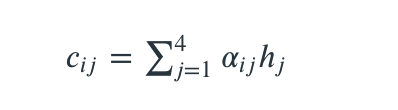

 

The attention weights are learned using an additional fully connected shallow network, denoted by fc , this is where the 𝑠0,𝑠1,𝑠2,𝑠3

 part of the attention mechanism's input comes into play. Computation of the attention weights are given by:

 
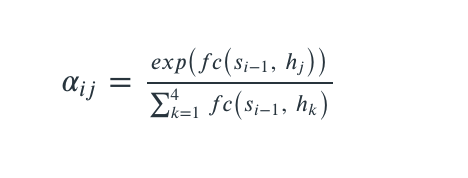
 

 

The attention weights are learned using the attention fully-connected network and a softmax function:

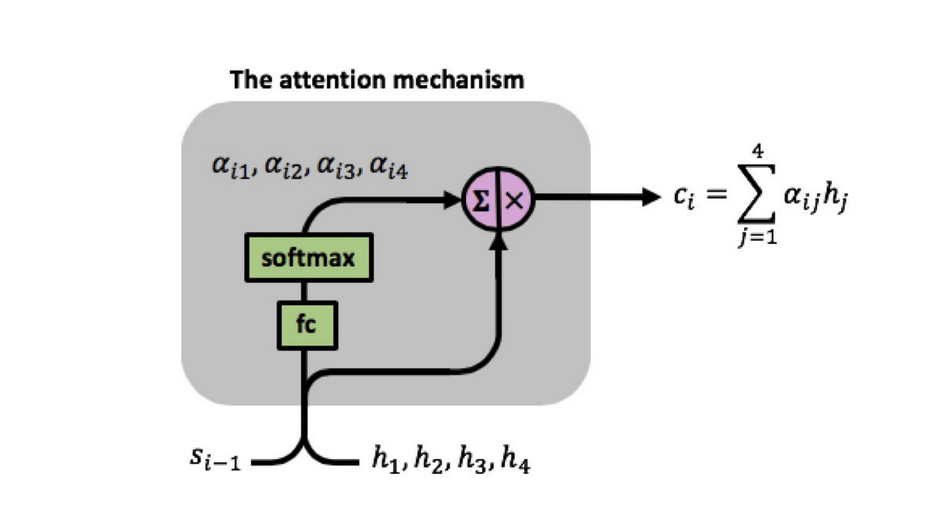

As can be seen in the image above, the fc receives the concatenated vectors [𝑠𝑖−1,ℎ𝑖]

as the input at time step i. The network has a single fc layer, the outputs of the layer are passed through a softmax function computing the attention weights

 

Notice that we are using the same  fully-connected network for all the concatenated pairs [𝑠0,ℎ1],[𝑠0,ℎ2],[𝑠0,ℎ3],[𝑠0,ℎ4]

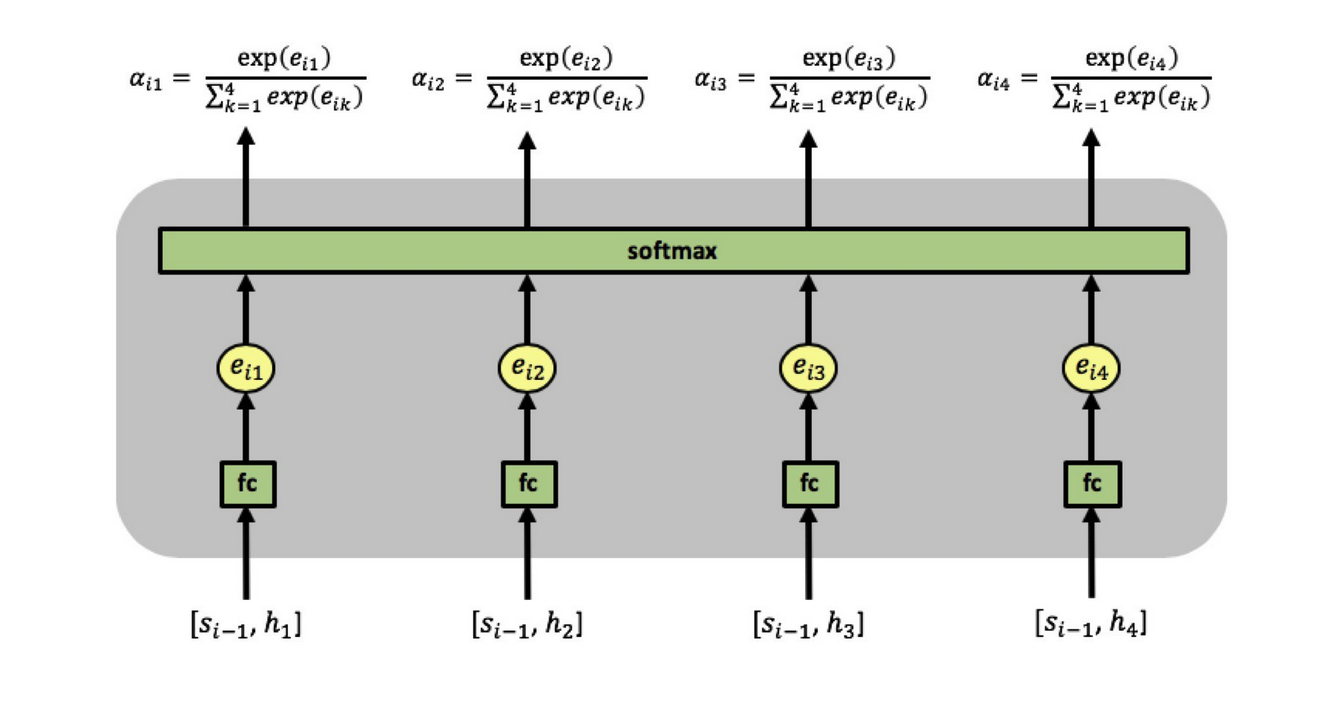

The fc network is trained along with the encoder and decoder using backpropagation, the RNN's prediction error terms are backpropagated backward through the decoder, then through the fc attention network and from there to the encoder.

 
**By letting the decoder have an attention mechanism, we relieve the encoder from having to encode all information in the input sequence into a single vector.** 



##Computing Attention Weights and Context Vectors

Let's go over a detailed example:

The first act performed is the computation of vectors  ℎ1,ℎ2,ℎ3,ℎ4 by the encoder. 

These are then used as inputs of the attention mechanism. This is where the decoder is first involved by inputting its initial state vector  𝑠0
 and we have the first attention input sequence  [𝑠0,ℎ1],[𝑠0,ℎ2],[𝑠0,ℎ3],[𝑠0,ℎ4]

 

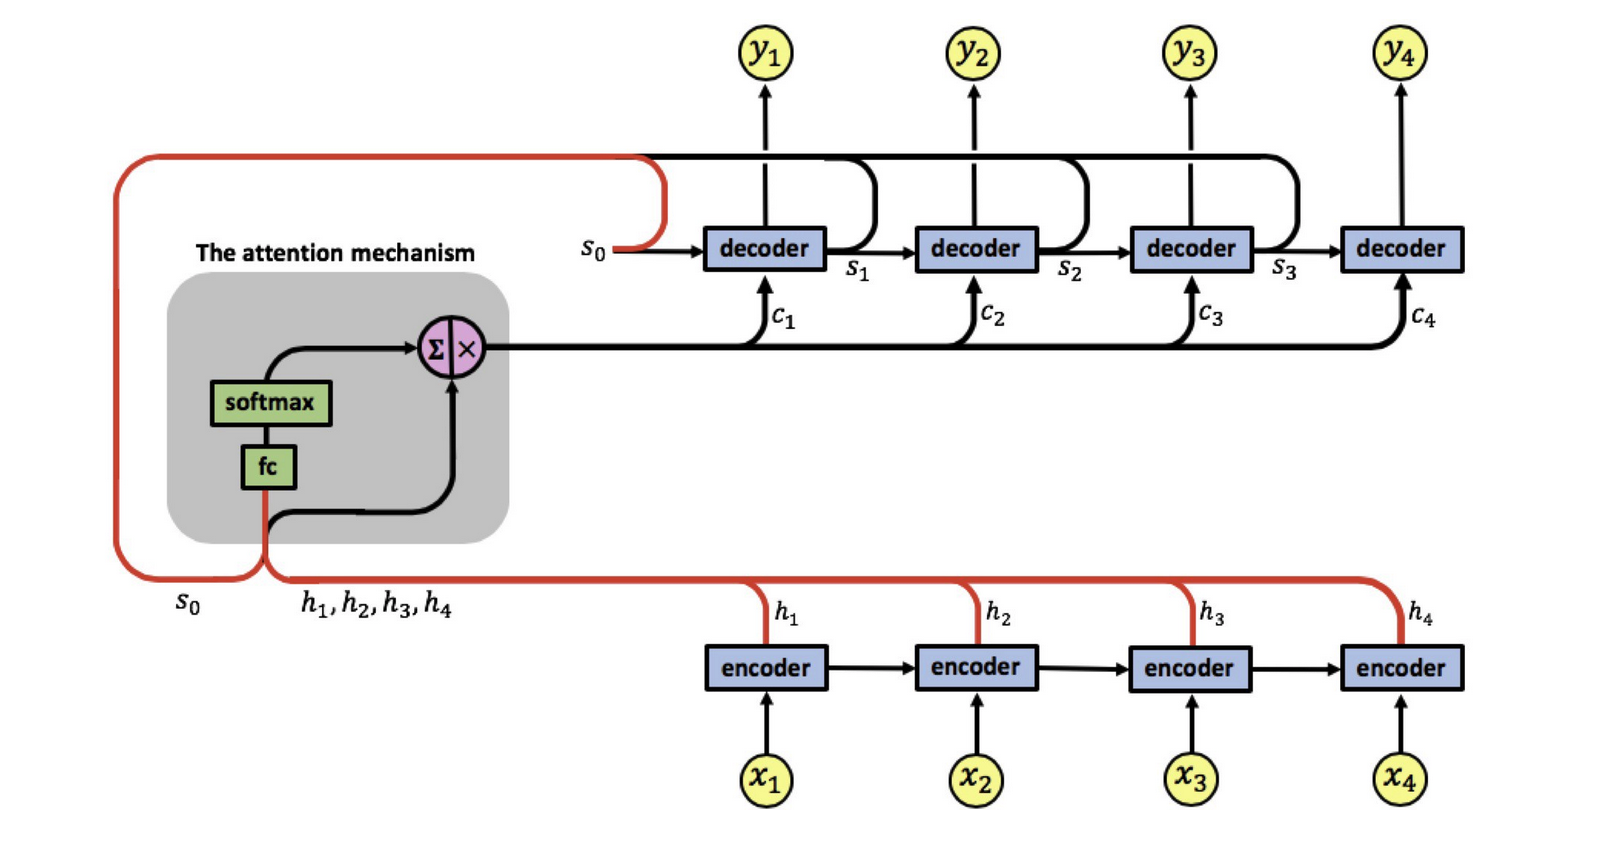

he attention mechanism computes the first set of attention weights enabling the computation of the first context vector 𝑐1. The decoder now uses [𝑠0,𝑐1]  and computes the first RNN output  𝑦1

.



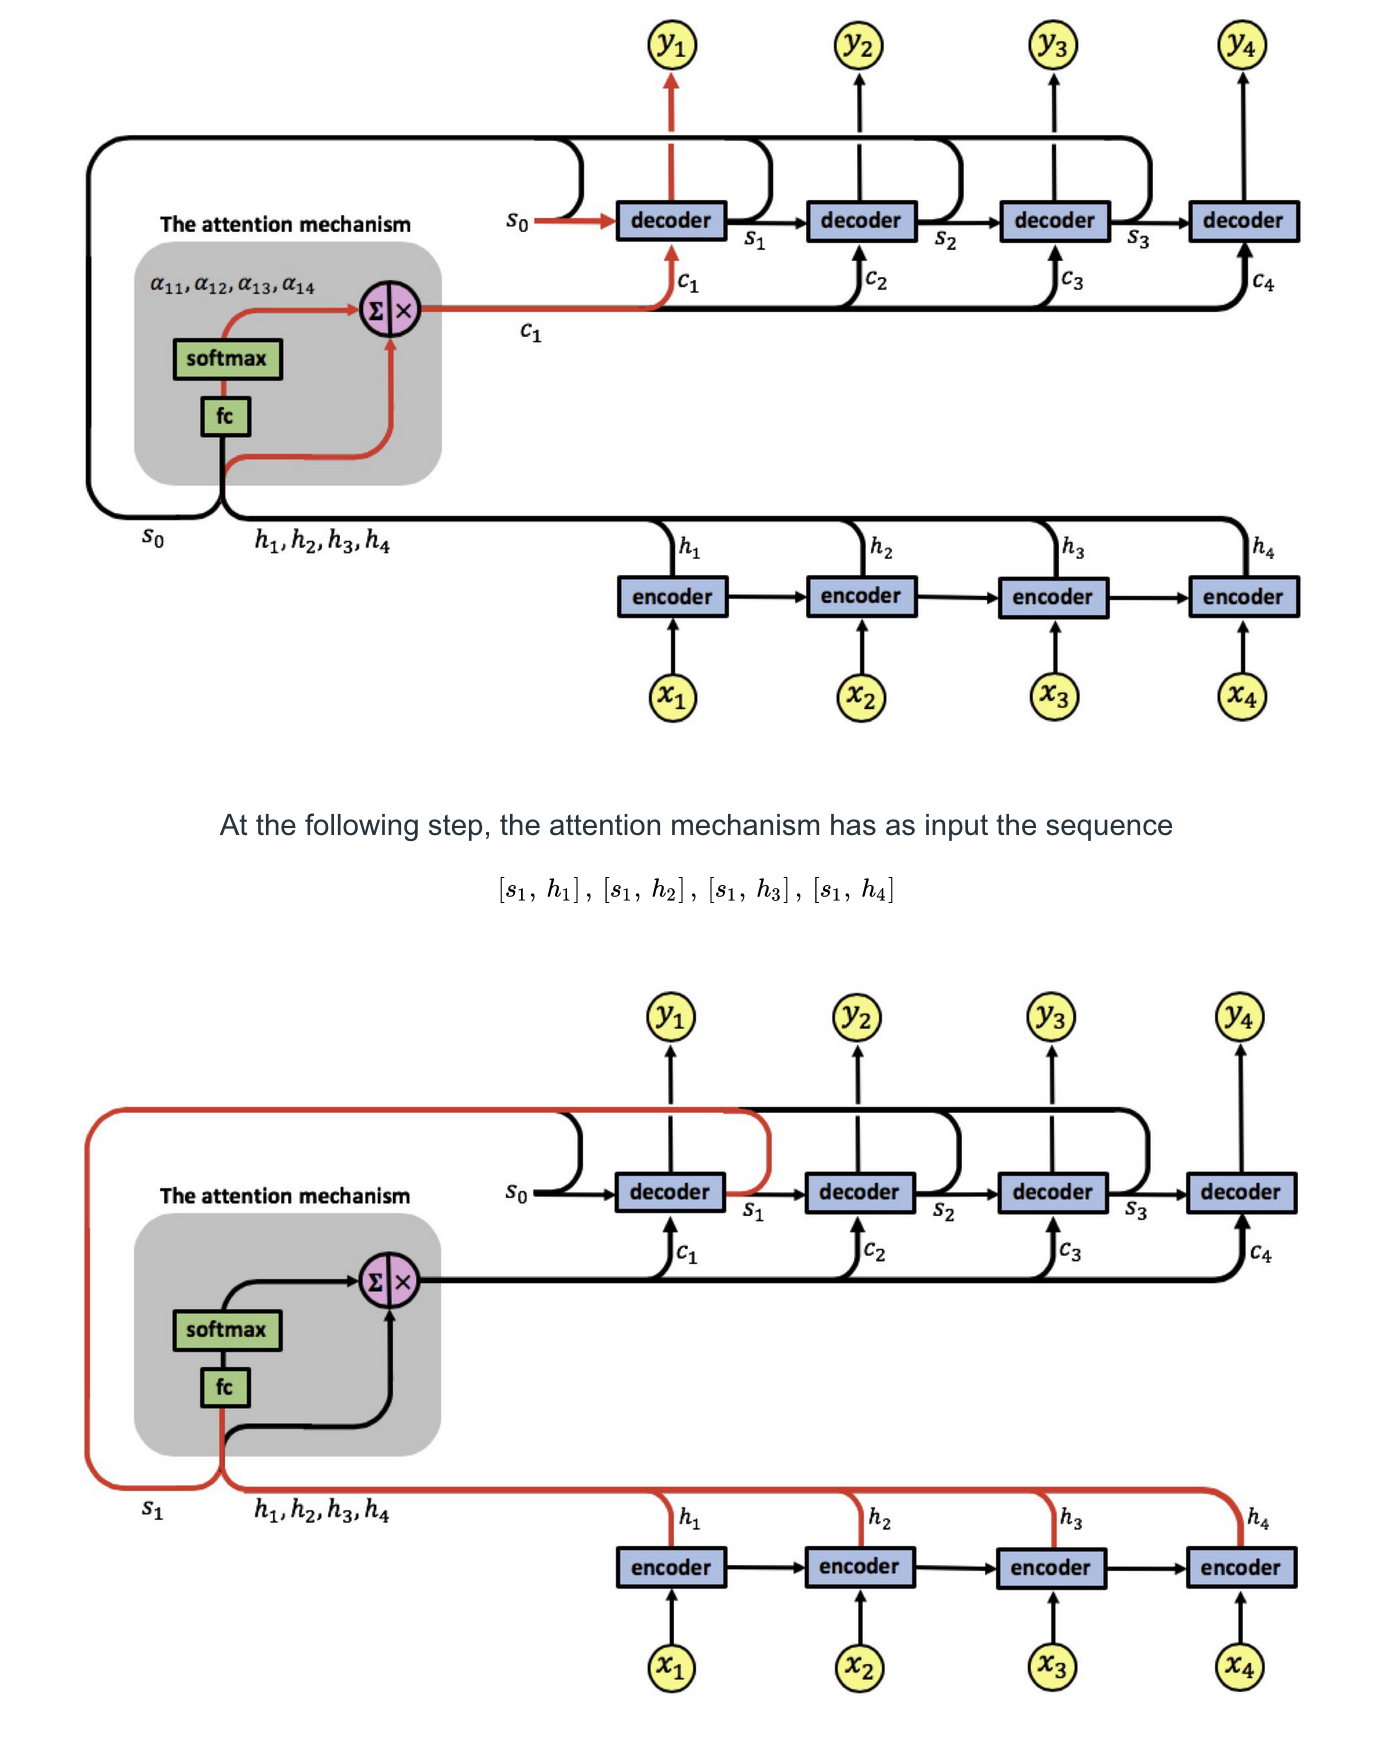

It computes a second set of weights enabling computation of the second context vector 𝑐2

. The decoder uses

[𝑠1,𝑐2]

and computes the second RNN output

𝑦2
. 

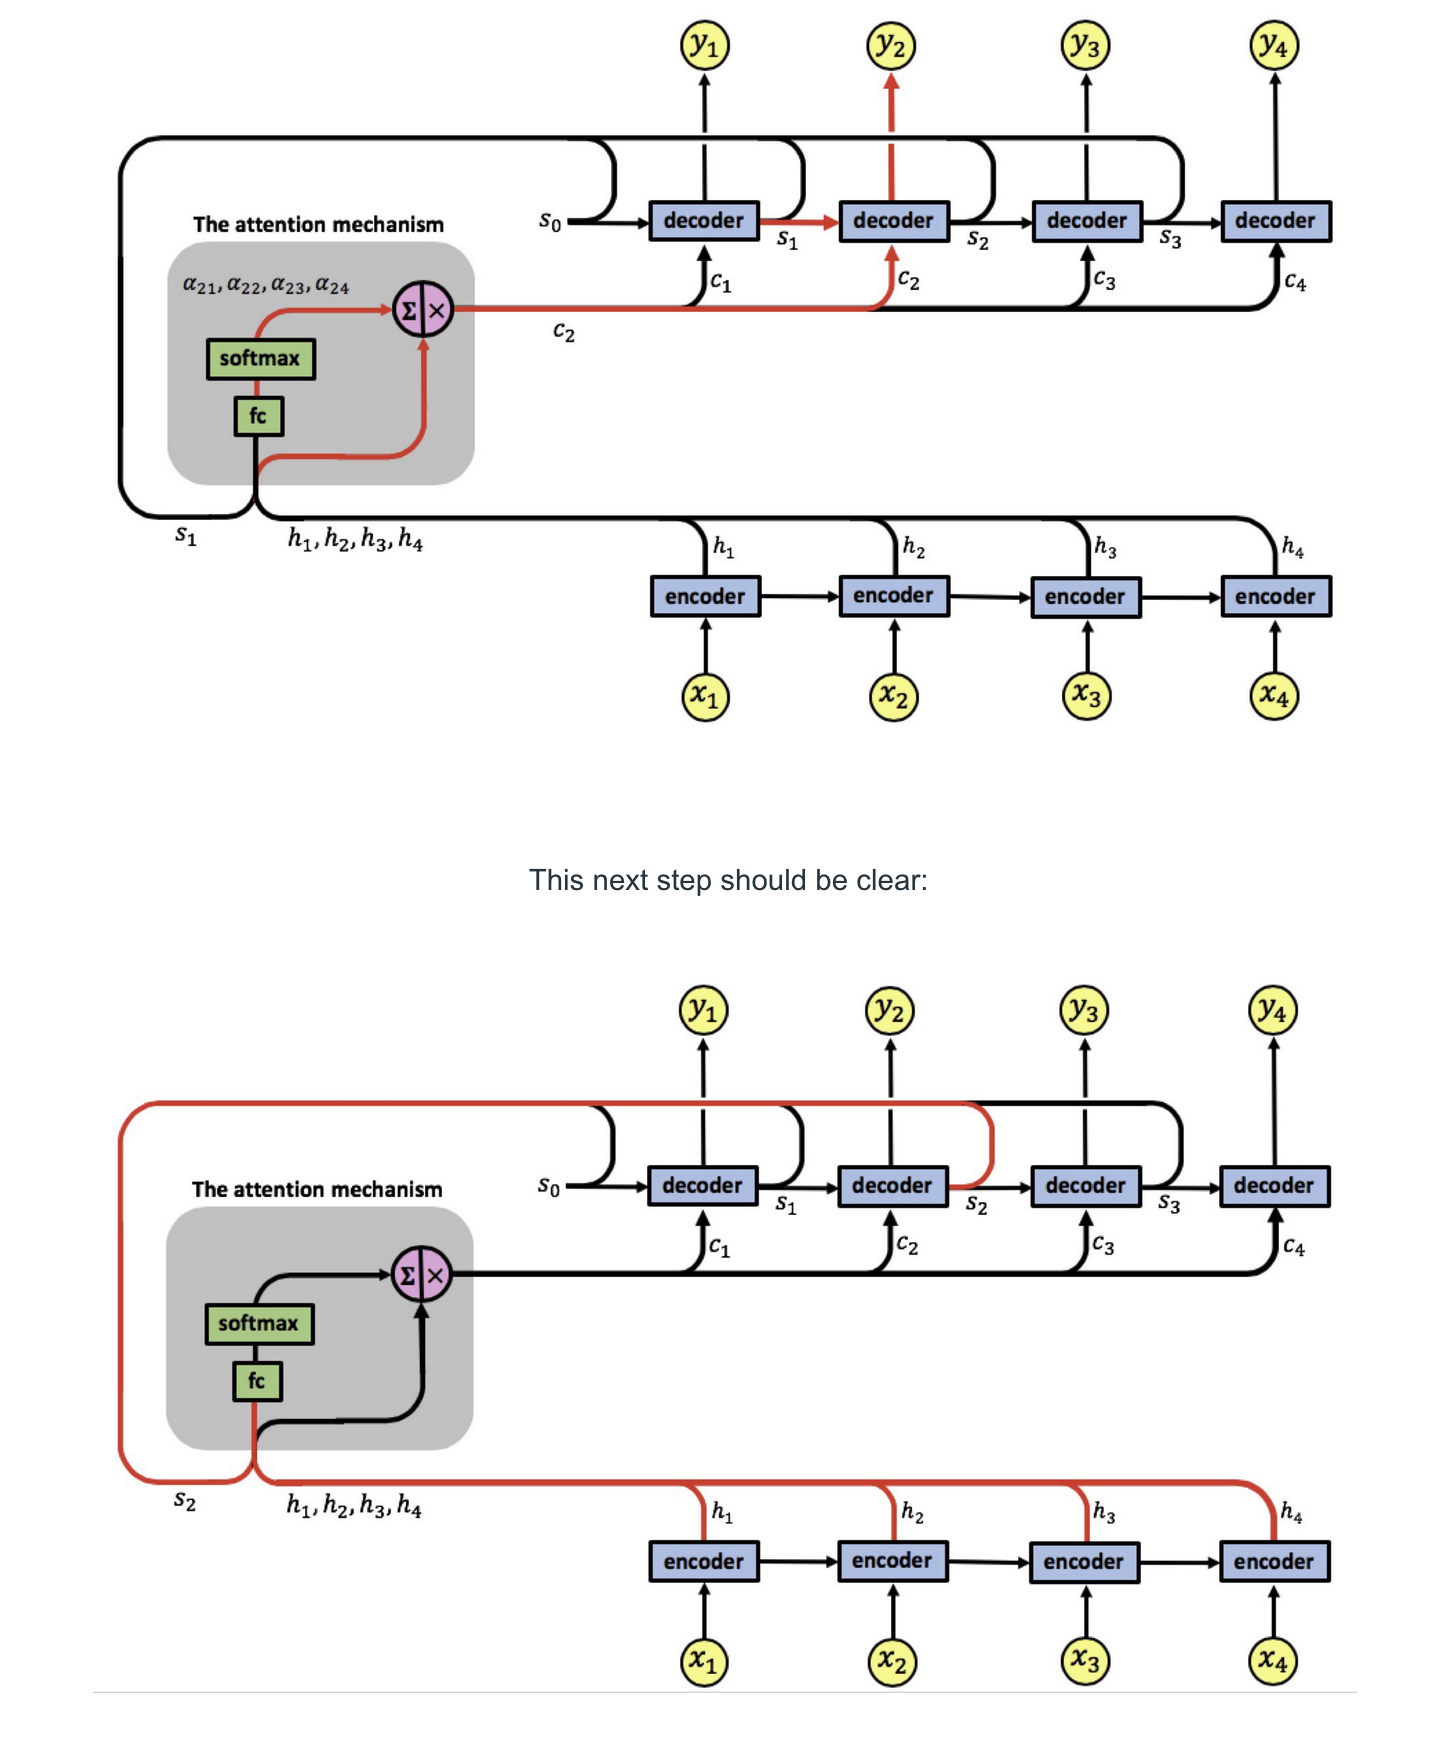

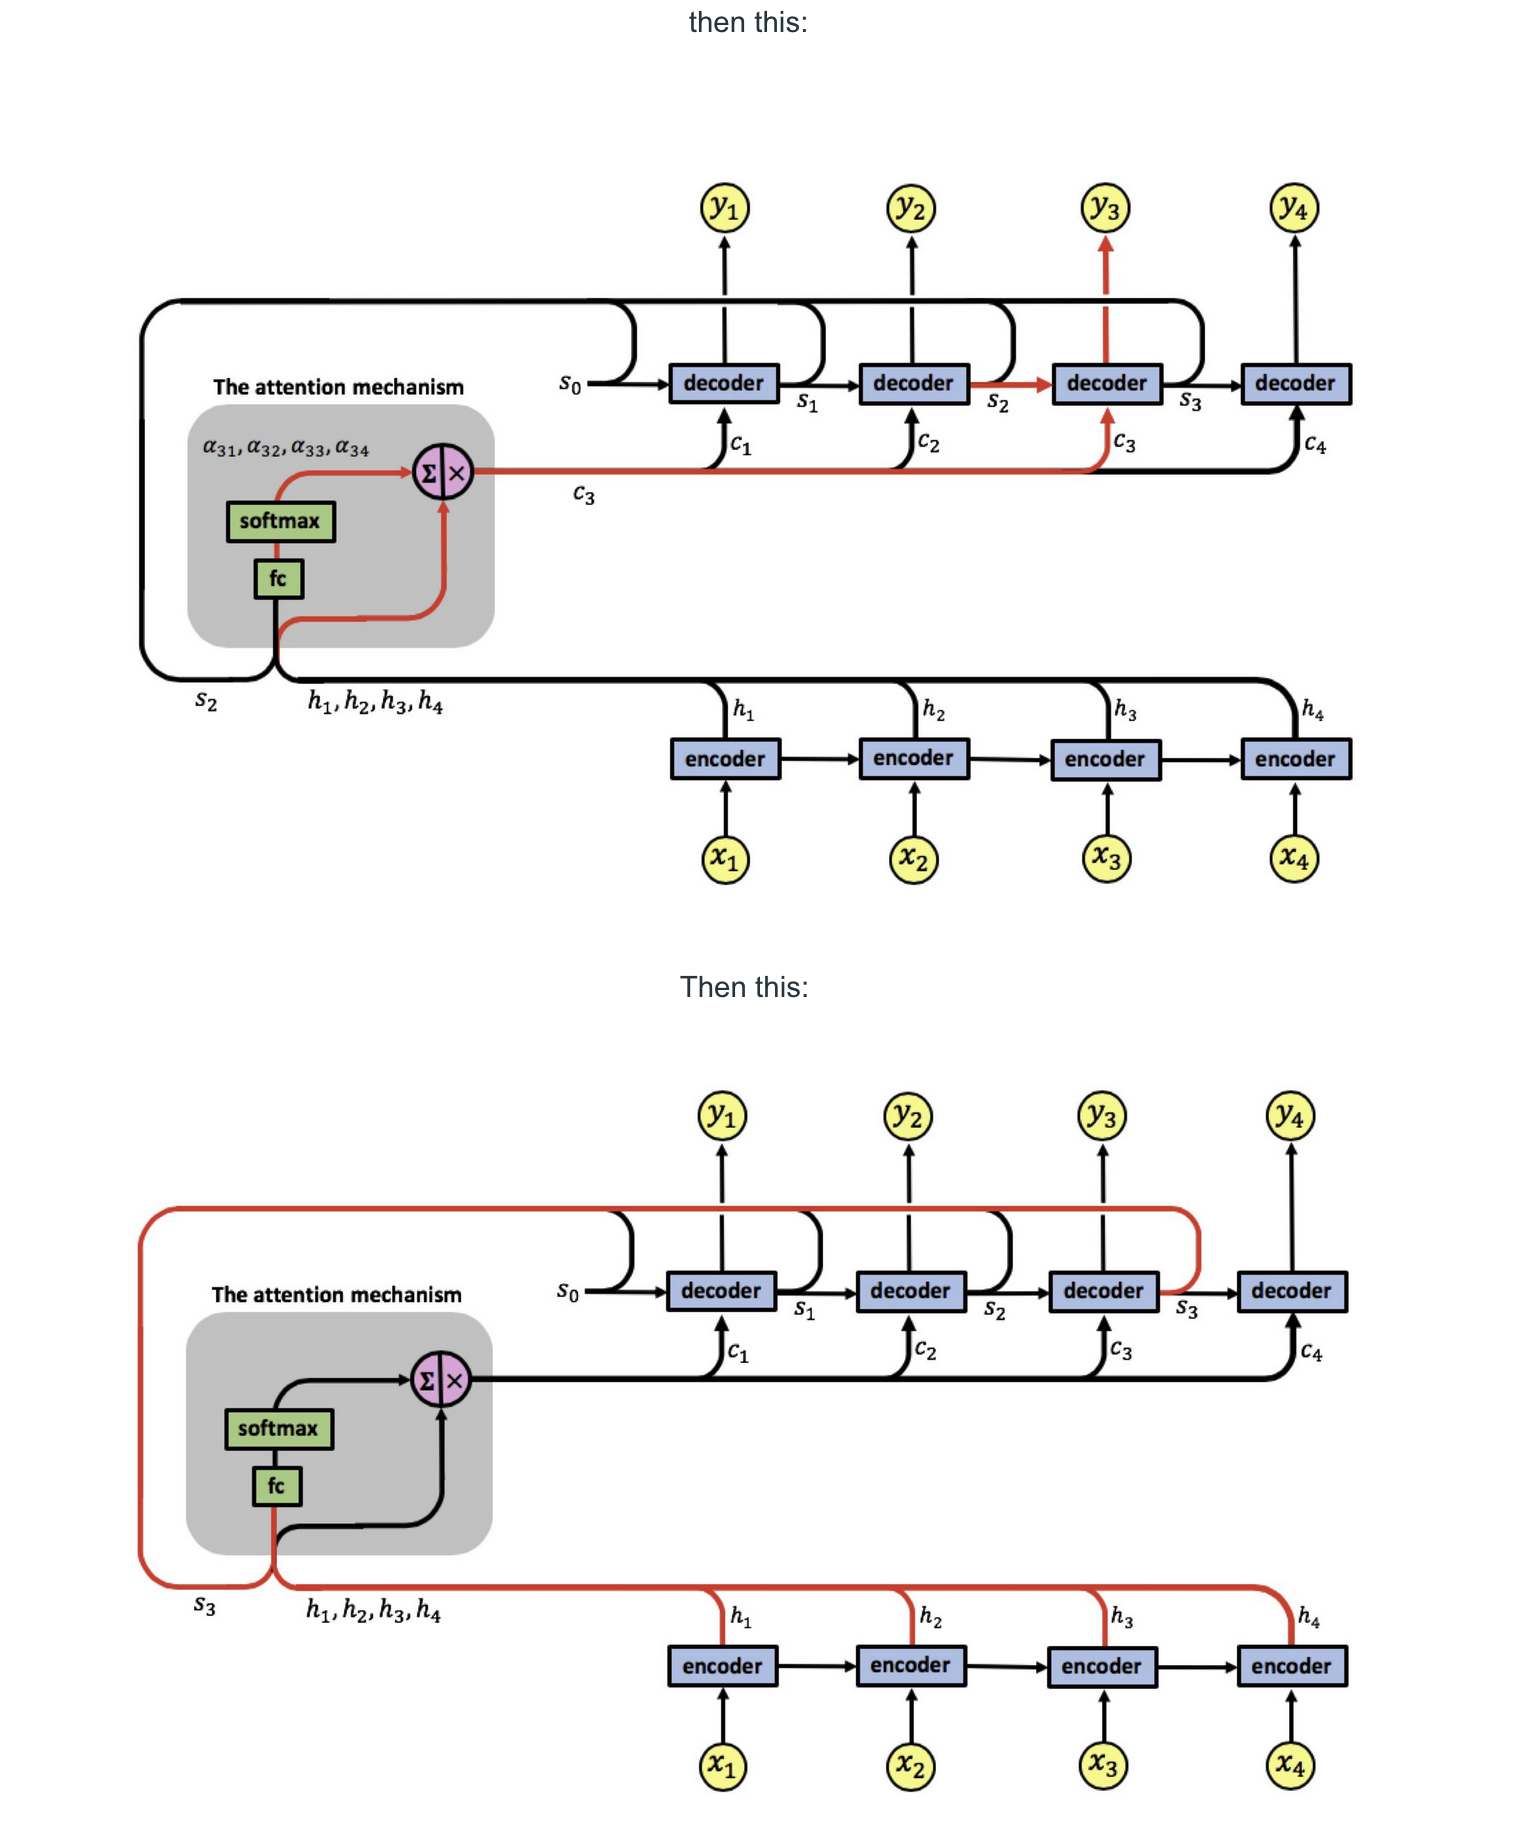

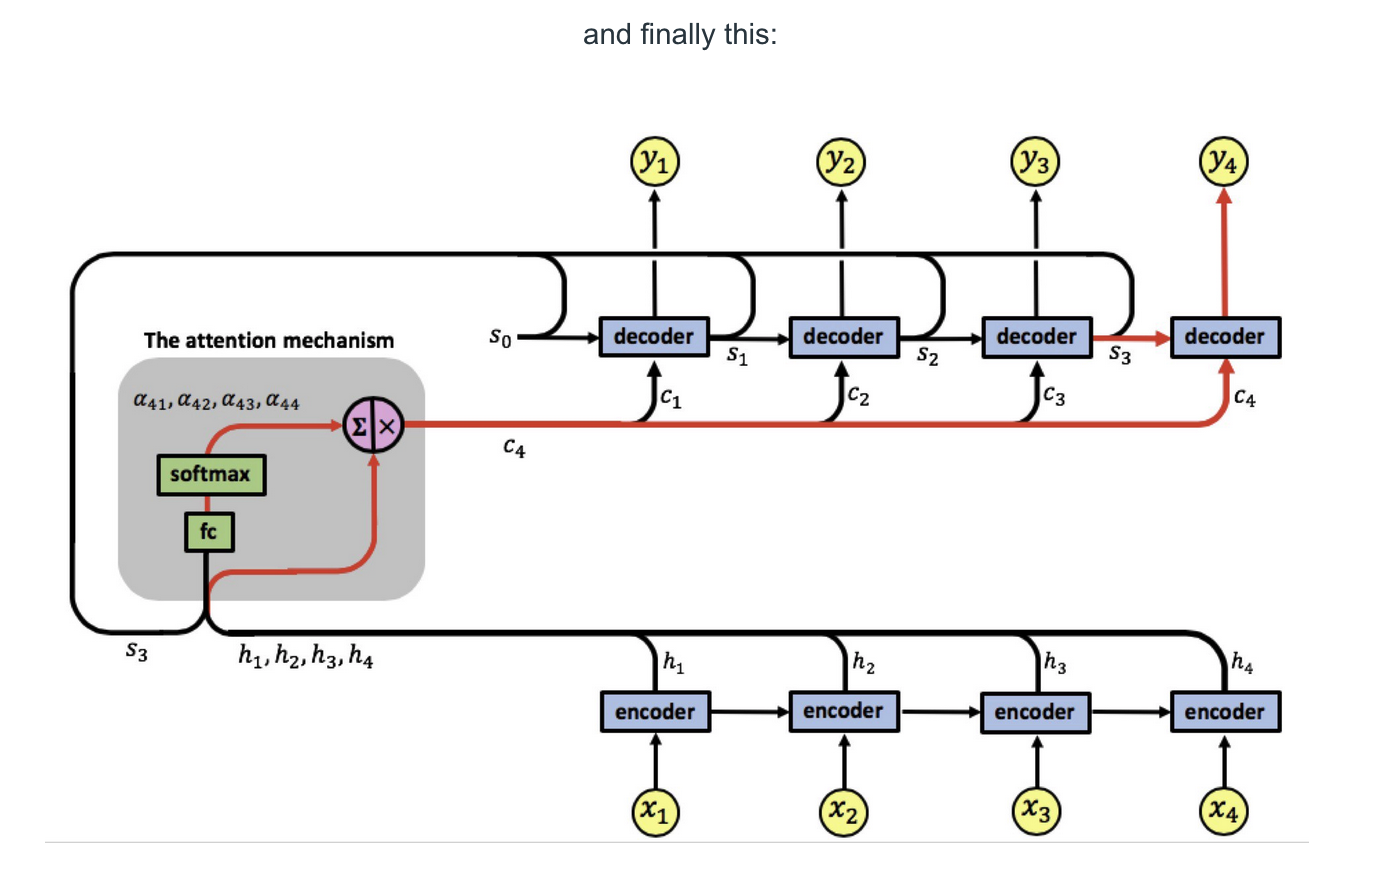

In the end, we have consumed 4 vectors, and with attention focused on a specific vector, we should and then made the prediction for each step. 

 

Below are two alignments found by the attention RNN. The x-axis and y-axis of each plot correspond to the words in the source sentence (English) and the generated translation (French), respectively.

 


Each pixel shows the weight α𝑖𝑗
of the 𝑗𝑡ℎ source word and the 𝑖𝑡ℎ target word, in grayscale (0: black, 1: white)

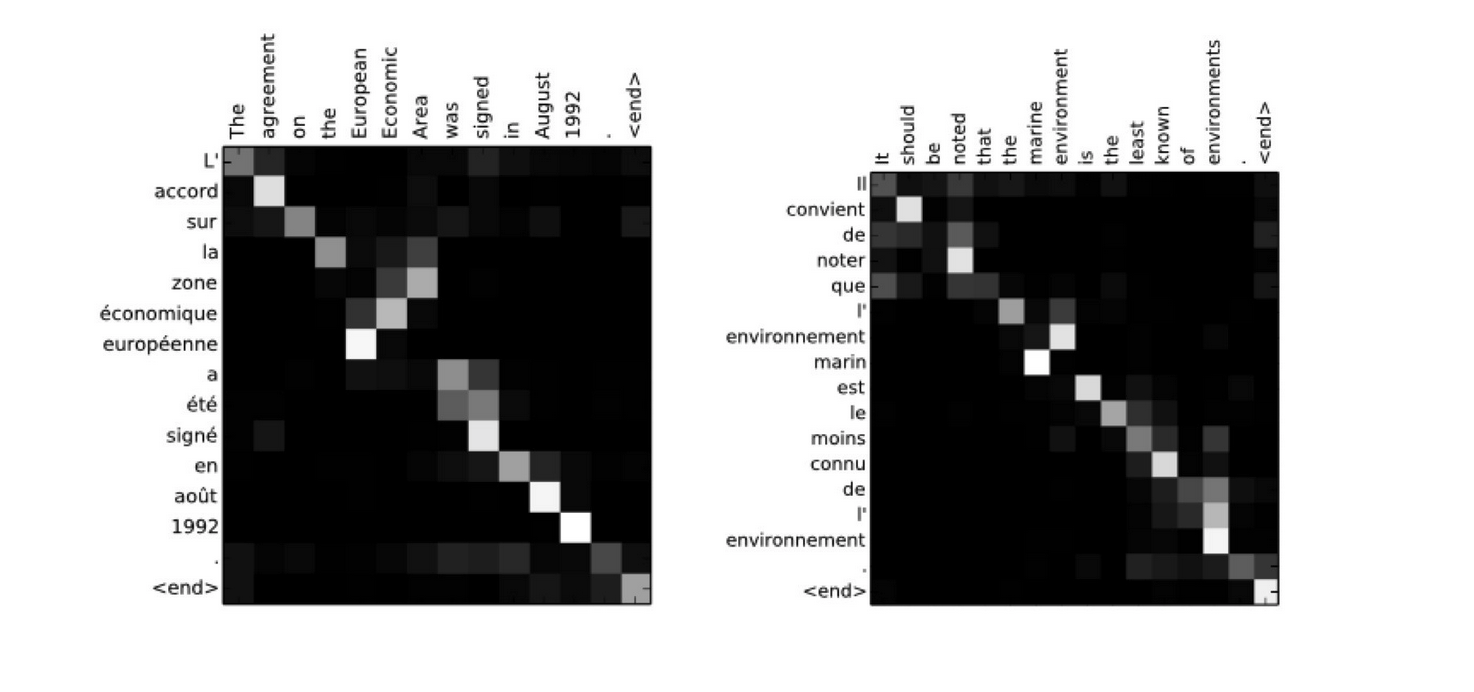

Better illustrations can be found here: https://distill.pub/2016/augmented-rnns/

#Starting with the code

In [1]:
%matplotlib inline

from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

!wget https://download.pytorch.org/tutorial/data.zip

!unzip data.zip

--2021-12-01 07:09:32--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 52.85.79.23, 52.85.79.74, 52.85.79.49, ...
Connecting to download.pytorch.org (download.pytorch.org)|52.85.79.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.07s   

2021-12-01 07:09:33 (41.4 MB/s) - ‘data.zip’ saved [2882130/2882130]

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.tx

### Create a class to to initiatize variables and define a function to add a sentence and a word

In [3]:
EOS_Token = 1
SOS_Token = 0

class Lang:
  def __init__(self,name):
    self.name = name
    self.word2index = {} # add an empty dictionary 
    self.word2count - {} # empty dictionary for number of times a word occurs
    self.index2word = {0:"SOS", 1:"EOS"}
    self.n_words = 2 # number of words, right now its just SOS and EOS

  # Create a new function to add a sentence to this particular class which 
  # i. extracts the count, 
  # ii. extracts the index of the words and 
  # iii. count number of words 
  def addSentence(self,sentence):
    for word in sentence.split(' '):
      self.addWord(word)

  def addWord(self,word):
    if word not in self.word2index:
      self.word2index[word] = self.n_words
      self.n_words += 1
      self.word2count[word]=1
      self.index2word[self.n_word] = word
    else:
      self.word2count[word] += 1

###Create a function to convert unicode to ASCII (copied from PyTorch doc)

In [4]:
# Turn a Unicode string to plain ASCII, thanks to
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

###Convert our sentences to lowercase, trim them and remove non-letter characters

In [5]:
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

###Main function

There are high chances that we get a data that can directly be parsed by inbuilt PyTorch tokenizer

In [ ]:
def readLangs(lang1, lang2, reverse = False):
  print("Reading the lines...")

  # Read the file and split the lines
  lines  = open('data/%s-%s.txt' %(lang1, lang2), encoding ='utf-8').read().strip().split('\n') 

  # Split every line into pairs and normalize
  pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

  # Reverse pairs, make Lang instances   